### Atributos de Textura de 1$^a$ ordem

Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:
- Média
- Variância
- Skewness
- Kurtosis
- Energia
- Entropia

# Atividade: 

## Implementar os atributos acima em uma imagem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import skimage
from skimage.io import imread,imsave
from skimage.color import rgb2gray
from PIL import Image
import math

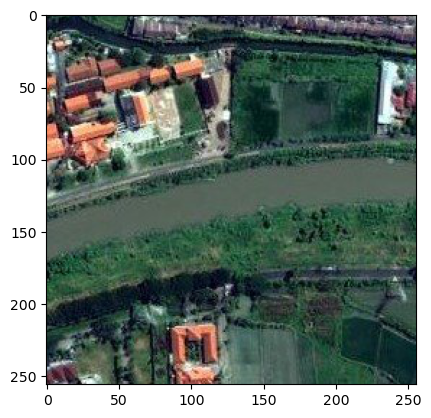

In [ ]:
#abrindo a imagem
img=imread('imagemrgb.png')
plt.imshow(img,cmap='gray')

#convertendo imagem em níveis de cinza
gray = np.mean(img, axis=2)

In [ ]:
def calcula_histograma(img):
    # convertendo a imagem em array numpy
    img = np.asarray(img)

    # achatando a matriz em array 1D
    flat = img.flatten()
    # coletando o histograma com a função numpy
    histogram, bin_edges = np.histogram(img, bins=256, range=(0, 256))
    return histogram

In [ ]:
def media_histograma(histograma):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += histograma[i]*i
        total += histograma[i]
    return soma/total

In [ ]:
def variancia_histograma(histograma,media):
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += (i-media)**2*histograma[i]
        total += histograma[i]
    return soma/total

In [ ]:
def skewness_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += ((i-media)/desvio_padrao)**3*histograma[i]
        total += histograma[i]
    return soma/total

In [ ]:
def kurtosis_histograma(histograma,media,variancia):
    desvio_padrao = variancia**0.5
    soma = 0
    total = 0
    for i in range(len(histograma)):
        soma += ((i-media)/desvio_padrao)**4*histograma[i]
        total += histograma[i]
    return soma/total-3

In [ ]:
def energia_histograma(histograma):
    soma = 0
    for i in range(len(histograma)):
        soma += histograma[i]**2
    return soma

In [ ]:
def entropia_histograma(histograma):
    soma = 0
    total = sum(histograma)
    for i in range(len(histograma)):
        p = histograma[i]/total
        if p > 0:
            soma += -p*math.log2(p)
    return soma

In [ ]:
def descritor_histograma(imagem):
    histograma = calcula_histograma(imagem)
    media = media_histograma(histograma)
    var = variancia_histograma(histograma,media)
    sk = skewness_histograma(histograma,media,var)
    kur = kurtosis_histograma(histograma,media,var)
    ener = energia_histograma(histograma)
    entr = entropia_histograma(histograma)

    return [media,var,sk,kur,ener,entr]

In [ ]:
descritor_histograma(gray)

[77.58604431152344,
 1792.3414122944232,
 1.1574767924251623,
 1.987204320147331,
 37457710,
 7.209221237208876]

- Utilizar a base de imagens do trabalho anterior
- Calcular os atributos de primeira ordem para cada imagem, e criar uma matriz
- Plotar os atributos dois a dois (scatter plot)
- A entrega será:
    - Notebook com os códigos;
    - Short paper de até 4 páginas com:
        - Introdução: apresentar o problema/base escolhida;
        - Metodologia: explicar os atributos e como são calculados;
        - Resultados: resultado da classificação e scatter plots dos atributos;
        - Extra: plotar os atributos utilizando um algoritmo de redução de dimensionalidade, ex: PCA, t-SNE;
        - Conclusão.
- Entrega e apresentação: 20/12/2022
